# Practicum II - Using News Headlines to Predict Stock Market Performance - EDA

Now that I have all of my data cleaned, it's time to start really digging into the data I have and exploring what I can do with it. In this notebook, I will explore the data I have through various means, including looking into various trends that might be present in time series analysis of stocks, examining correlations between the various data measurements given for the stocks, and further exploring the headlines tokenization, among other things. Like in the last notebook, let's start with loading the necessary packages and reading in my data:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from pylab import rcParams
from nltk.tokenize import word_tokenize
from nltk.probability import ConditionalFreqDist
import operator
from wordcloud import WordCloud

In [2]:
DJIA = pd.read_csv('data/cleaned/DJIA.csv')
combined = pd.read_csv('data/cleaned/combined.csv')
headlines = pd.read_csv('data/cleaned/headlines.csv')

print("headlines: ")
display(headlines.head())
print("DJIA: ")
display(DJIA.head())
print("combined_df: ")
display(combined.head())

headlines: 


,Date,News,tokenized,News_cleaned,cleaned_tokenized
0,2016-07-01,A 117 year old woman in Mexico City finally re...,"['A', '117', 'year', 'old', 'woman', 'in', 'Me...",year old woman mexico city finally received bi...,"['year', 'old', 'woman', 'mexico', 'city', 'fi..."
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,"['IMF', 'chief', 'backs', 'Athens', 'as', 'per...",imf chief backs athens permanent olympic host,"['imf', 'chief', 'backs', 'athens', 'permanent..."
2,2016-07-01,The president of France says if Brexit won so ...,"['The', 'president', 'of', 'France', 'says', '...",president france says brexit donald trump,"['president', 'france', 'says', 'brexit', 'don..."
3,2016-07-01,British Man Who Must Give Police 24 Hours Noti...,"['British', 'Man', 'Who', 'Must', 'Give', 'Pol...",british man must give police hours notice sex ...,"['british', 'man', 'must', 'give', 'police', '..."
4,2016-07-01,100 Nobel laureates urge Greenpeace to stop op...,"['100', 'Nobel', 'laureates', 'urge', 'Greenpe...",nobel laureates urge greenpeace stop opposing ...,"['nobel', 'laureates', 'urge', 'greenpeace', '..."


DJIA: 


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


combined_df: 


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16_cleaned_tokenized,Top17_cleaned_tokenized,Top18_cleaned_tokenized,Top19_cleaned_tokenized,Top20_cleaned_tokenized,Top21_cleaned_tokenized,Top22_cleaned_tokenized,Top23_cleaned_tokenized,Top24_cleaned_tokenized,Top25_cleaned_tokenized
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into South...,Russian tanks are moving towards the capital o...,Afghan children raped with impunity UN officia...,150 Russian tanks have entered South Ossetia w...,Breaking Georgia invades South Ossetia Russia ...,The enemy combatent trials are nothing but a s...,...,"['georgia', 'invades', 'south', 'ossetia', 'ru...","['al', 'qaeda', 'faces', 'islamist', 'backlash']","['condoleezza', 'rice', 'us', 'would', 'act', ...","['busy', 'day', 'european', 'union', 'approved...","['georgia', 'withdraw', 'soldiers', 'iraq', 'h...","['pentagon', 'thinks', 'attacking', 'iran', 'b...","['caucasus', 'crisis', 'georgia', 'invades', '...","['indian', 'shoe', 'manufactory', 'series', 'l...","['visitors', 'suffering', 'mental', 'illnesses...","['help', 'mexicos', 'kidnapping', 'surge']"
1,2008-08-11,1,Why wont America and Nato help us If they wont...,Bush puts foot down on Georgian conflict,Jewish Georgian minister Thanks to Israeli tra...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks faked,What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in SOssetia blames ...,...,"['israel', 'us', 'behind', 'georgian', 'aggres...","['believe', 'tv', 'neither', 'russian', 'georg...","['riots', 'still', 'going', 'montreal', 'canad...","['china', 'overtake', 'us', 'largest', 'manufa...","['war', 'south', 'ossetia', 'pics']","['israeli', 'physicians', 'group', 'condemns',...","['russia', 'beaten', 'united', 'states', 'head...","['perhaps', 'question', 'georgia', 'russia', '...","['russia', 'much', 'better', 'war']","['come', 'trading', 'sex', 'food']"
2,2008-08-12,0,Remember that adorable 9 year old who sang at ...,Russia ends Georgia operation,If we had no sexual harassment we would have n...,Al Qaeda is losing support in Iraq because of ...,Ceasefire in Georgia Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO 1...,Stratfor The Russo Georgian War and the Balanc...,Im Trying to Get a Sense of This Whole Georgia...,...,"['us', 'troops', 'still', 'georgia', 'know', '...","['russias', 'response', 'georgia', 'right']","['gorbachev', 'accuses', 'us', 'making', 'seri...","['russia', 'georgia', 'nato', 'cold', 'war', '...","['remember', 'adorable', 'year', 'old', 'led',...","['war', 'georgia', 'israeli', 'connection']","['signs', 'point', 'us', 'encouraging', 'georg...","['christopher', 'king', 'argues', 'us', 'nato'...","['america', 'new', 'mexico']","['bbc', 'news', 'asia', 'pacific', 'extinction..."
3,2008-08-13,0,US refuses Israel weapons to attack Iran report,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,Britain\s policy of being tough on drugs is po...,Body of 14 year old found in trunk Latest rans...,China has moved 10 million quake survivors int...,Bush announces Operation Get All Up In Russias...,Russian forces sink Georgian ships,...,"['elephants', 'extinct']","['us', 'humanitarian', 'missions', 'soon', 'ge...","['georgias', 'ddos', 'came', 'us', 'sources']","['russian', 'convoy', 'heads', 'georgia', 'vio...","['israeli', 'defence', 'minister', 'us', 'stri...","['gorbachev', 'choice']","['witness', 'russian', 'forces', 'head', 'towa...","['quarter', 'russians', 'blame', 'us', 'confli...","['georgian', 'president', 'says', 'us', 'milit...","['nobel', 'laureate', 'aleksander', 'solzhenit..."
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me

One thing I want to verify is that the `Date` columns persisted as datetime objects, which I somewhat doubt they were. Let's check this and modify these columns as needed if they were read in as strings again:

In [3]:
print("headlines: ")
display(headlines['Date'].dtype)
print("DJIA: ")
display(DJIA['Date'].dtype)
print("combined: ")
display(combined['Date'].dtype)

headlines: 


dtype('O')

DJIA: 


dtype('O')

combined: 


dtype('O')

Looks like their `object` type again, so let's cast back to `datetime` objects before moving on to EDA:

In [4]:
# set format string since all have same format
date_format = "%Y-%m-%d"
# use pd.to_datetime to convert strings to datetime objects
headlines['Date'] = pd.to_datetime(headlines['Date'], format = date_format)
combined['Date'] = pd.to_datetime(combined['Date'], format = date_format)
DJIA['Date'] = pd.to_datetime(DJIA['Date'], format = date_format)

print("headlines: ")
display(str(headlines['Date'].dtype))
print("DJIA: ")
display(str(DJIA['Date'].dtype))
print("combined: ")
display(str(combined['Date'].dtype))

headlines: 


'datetime64[ns]'

DJIA: 


'datetime64[ns]'

combined: 


'datetime64[ns]'

Great now we can move on to bigger and better things!

The first thing I want to do in terms of exploring the data is related to the timeseries nature of stock market data. I want to see what this data looks like decomposed into the various trends that are likely present in the data. We can do this using the `statsmodels.api` package where we will make use of the `seasonal_decompose` function. To do this, let's isolate the date and stock closing prices from the DJIA dataset, then apply the `seasonal_decompose` function to this. For the type of decompositional model, I am going to go with a multiplicative model because when it comes to stocks we care much more about the percentage difference from one time period to the next than we care about the absolute difference between these two numbers:

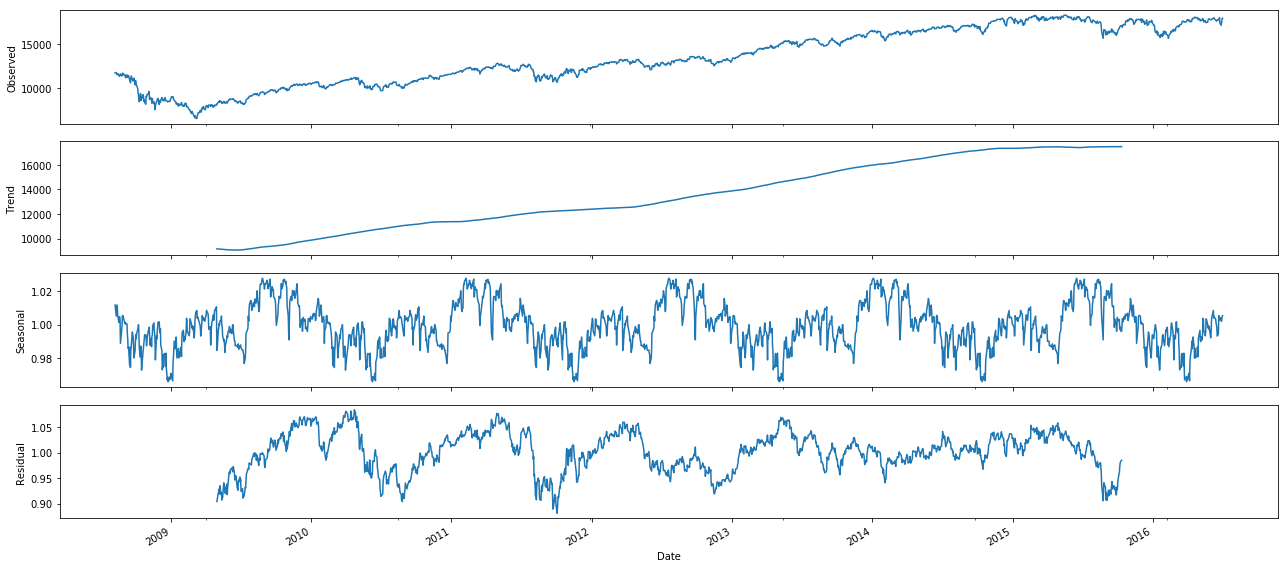

In [5]:
# adjust figure size, couldn't get to work with previous approach so using this
rcParams['figure.figsize'] = 18, 8
# grab just Date and closing value columns
temp = DJIA[['Date', 'Close']]
# need to set the date as the index for the seasonal_decompose function to work properly
temp = temp.set_index('Date')
# apply seasonal_decomposition function
decomp = sm.tsa.seasonal_decompose(temp, model='multiplicative', freq=365)
decomp.plot()
plt.savefig("visualizations/seasonal_decomposition/DJIA_close_value_seasonal_decomposition.png")

Very interesting stuff here. Clearly the general trend is that the stock market has been steadily rising over this 8 year period, but what's really interesting to me is the seasonal aspect of this decomposistion. Looking at the seasonal trend, it appears that, typically, the stock market rises at the beginning of the year, takes a tumble in the middle of the year, then rises again, before finally taking one last tumble at the end of the year. This isn't strictly true for every year here, but for the most part the pattern holds, which is very useful to know in and of itself! 

Next let's take a look at how the various metrics in the DJIA dataset relate to one another by creating a correlation matrix as well as correlation scatter plots: 

In [6]:
DJIA.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999592,0.999436,0.998991,-0.691621,0.998991
High,0.999592,1.000000,0.999373,0.999546,-0.686997,0.999546
Low,0.999436,0.999373,1.000000,0.999595,-0.699572,0.999595
Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000
Volume,-0.691621,-0.686997,-0.699572,-0.694281,1.000000,-0.694281
Adj Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000


From this correlation matrix, it is very clear that all metrix are very positively correlated with the exception of Volume, Volume has a strong _negative_ correlation with all other metrics in this dataset. This is very interesting to me and tells me that high trading days typically mean people are rushing to sell their stocks, which results in a plunge in the stock market. Something that supports this idea is the fact that the strongest negative correlation between volume and another metric is with the Low of the day while the weakest is between volumn and the High of the day. This tells me that when the low of the day is still relatively high, people are much less likely to put in trades than they would if the low were exceptionally low, at which point buyers would be ready to buy up whatever they can while weary stock holders might be nervous that this low is a sign of a bad market turn, so they sell off what they can in order to keep whatever profits they may have already made on those stocks, and of course the other way around when the high of the day is exceptionally high.

I know this probably won't tell us too much, but let's take a look at a visual representation of this output using the `scatter_matrix` function:

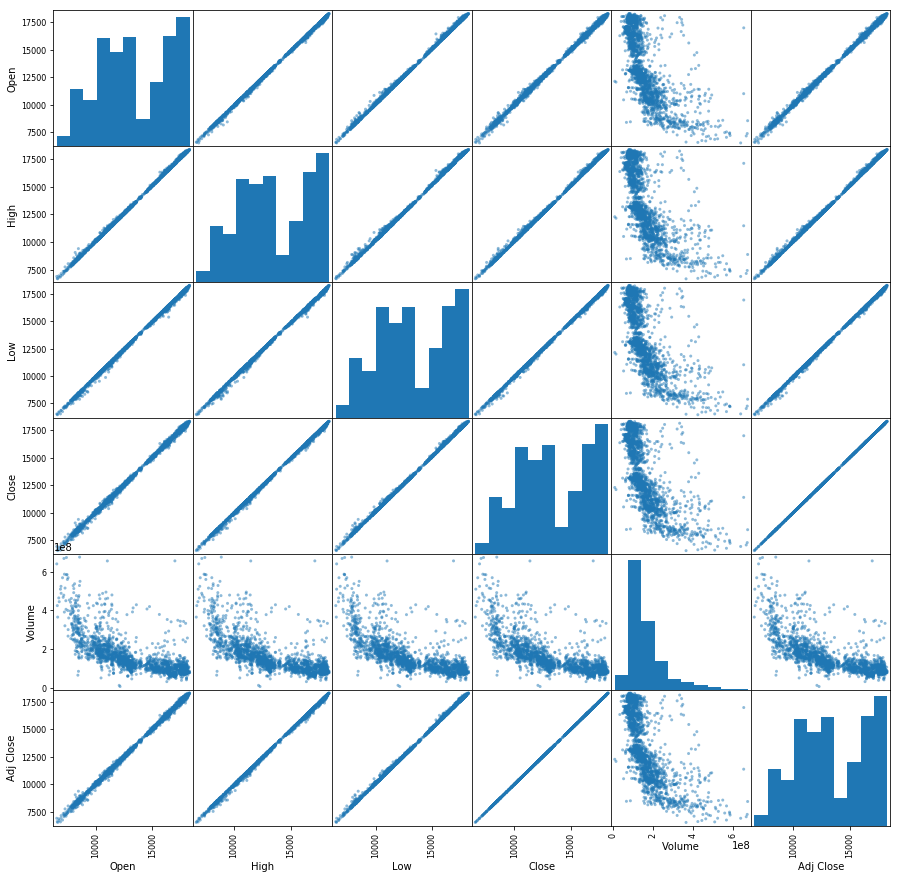

In [7]:
pd.plotting.scatter_matrix(DJIA, figsize = (15, 15))
plt.savefig("visualizations/scatter_matrices/DJIA_scatter_matrix.png")

Just as I thought this didn't really add many insights as the near perfect correlations between all metrics other than Volume are practically perfectly straight lines. What this does show, however, is a confirmation that a very high volume of trades occur on days when stocks have a low value and the amount of trading decreases as the value of the stock increases. This makes sense to me because of the age old addage to "Buy Low Sell High". This tells me one of two things: either people are really good at taking the buy low advice, but not quite so much with the sell high advice, or since people are so disinclined to buy high it doesn't really work out to sell high because no one is there to buy. In all actuality, I imagine these two things have a combinatorial impact on what we see here. Another interesting thing I see with the volume data is that these correlation plots show a variable variance within them where the varaince of trade volume is much wider on days where stock values are lower while the variance window tightens as stock prices go up. This tells me that people are much less certain about what to do with their stocks when stock value is low whereas people seem to be more in sync when stock values are high. This suggests to me that people are fairly confident when the stock market is doing well that it will continue to do well but a large amount of uncertainty is introduced when the market begins doing poorly. 

Another interesting things that this scatter matrix tells me is more in relation to the distribution of the columns (seen in the histograms where column match with themselves) than the correlations themselves. All metrics aside from Volume have a very clear bimodal distribution along with a left skew while the Volume column has a unimodal distribution but a clear right skew. I'm not sure what this really means, but it's interesting to note either way. 

Another thing I'm interested in seeing is if there are any days where the open of the day was also the highest or lowest price of the day, indicating that, on that day, stocks either strictly went down or strictly went up, respectively. Let's see how we might be able to isolate this, starting with days wehre the market Open was as high or higher than the daily high, indicating that the market didn't do better than its opening price on that day:

In [8]:
high_open = DJIA[DJIA['Open'] >= DJIA['High']]
high_open

,Date,Open,High,Low,Close,Volume,Adj Close
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
10,2016-06-17,17733.439453,17733.439453,17602.779297,17675.160156,248680000,17675.160156
15,2016-06-10,17938.820312,17938.820312,17812.339844,17865.339844,90540000,17865.339844
30,2016-05-19,17514.160156,17514.160156,17331.070312,17435.400391,95530000,17435.400391
32,2016-05-17,17701.460938,17701.460938,17469.919922,17529.980469,103260000,17529.980469
36,2016-05-11,17919.029297,17919.029297,17711.050781,17711.119141,87390000,17711.119141
42,2016-05-03,17870.750000,17870.750000,17670.880859,17750.910156,97060000,17750.910156
48,2016-04-25,17990.939453,17990.939453,17855.550781,17977.240234,83770000,17977.240234
60,2016-04-07,17687.279297,17687.279297,17484.230469,17541.960938,90120000,17541.960938


Fascinating! There are 200 days in which the Opening price was the highest price of the day, indicating that stocks immediately went down and didn't recover on those days. Now lets look for days that are the othe way around where the Open of the day was the lowest point for that day and stocks immediately went up and never ended up below that opening price:

In [9]:
low_open = DJIA[DJIA['Open'] <= DJIA['Low']]
low_open

,Date,Open,High,Low,Close,Volume,Adj Close
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
9,2016-06-20,17736.869141,17946.359375,17736.869141,17804.869141,99380000,17804.869141
17,2016-06-08,17931.910156,18016.000000,17931.910156,18005.050781,71260000,18005.050781
18,2016-06-07,17936.220703,18003.230469,17936.220703,17938.279297,78750000,17938.279297
26,2016-05-25,17735.089844,17891.710938,17735.089844,17851.509766,79180000,17851.509766
27,2016-05-24,17525.189453,17742.589844,17525.189453,17706.050781,86480000,17706.050781
29,2016-05-20,17437.320312,17571.750000,17437.320312,17500.939453,111990000,17500.939453
33,2016-05-16,17531.759766,17755.800781,17531.759766,17710.710938,88440000,17710.710938


Wow it looks like in the 8 year period of this dataset there were more days in which stocks opened at their lowest price of the day and never dipped below that opening price. This makes sense to me that there would be more of these days than ones where the market opened at the highest price of the day due to the general upward trend we saw in the decomposition of closing prices in this dataset.

Something I'm now very interested in is if there are any days that opened with the highest price of the day and closed with the lowest of the day or vice versa, opened with the lowest price of the day and closed with the highest. To determine this, I'll first grab rows in which the closing price of the day was the lowest price of the day as well as instances in which the highest price of the day was also the closing price. Then, I will merge these new datasets with the high opening and low opening dataframes, respectively, with an inner join in order to get only days in which the stocks opened at the highest and closed at the lowest of the day as well as days that stocks opened at the lowest and closed at the highest of the day, respectively. First let's grab rows in which the closing price was also the lowest of the day:

In [10]:
low_close = DJIA[DJIA['Close'] <= DJIA['Low']]
low_close

,Date,Open,High,Low,Close,Volume,Adj Close
218,2015-08-20,17345.320312,17345.320312,16990.689453,16990.689453,128530000,16990.689453
257,2015-06-25,17977.109375,18036.099609,17890.359375,17890.359375,78990000,17890.359375
258,2015-06-24,18139.099609,18139.099609,17966.070312,17966.070312,104980000,17966.070312
321,2015-03-25,18012.609375,18041.970703,17718.539062,17718.539062,106560000,17718.539062
323,2015-03-23,18136.730469,18205.929688,18116.039062,18116.039062,98030000,18116.039062
332,2015-03-10,17989.560547,17989.560547,17662.939453,17662.939453,120450000,17662.939453
390,2014-12-12,17590.050781,17590.050781,17280.830078,17280.830078,121950000,17280.830078
445,2014-09-25,17204.859375,17204.859375,16945.800781,16945.800781,93520000,16945.800781
447,2014-09-23,17165.910156,17171.880859,17055.869141,17055.869141,77090000,17055.869141
484,2014-07-31,16869.630859,16869.630859,16563.300781,16563.300781,101670000,16563.300781


Interesting, much fewer days closed at the lowest price of the day than opened at the lowest price of the day, this difference is essentially by a factor of 10! Now let's grab the days in which the DJIA closed at the highest price of the day:

In [11]:
high_close = DJIA[DJIA['Close'] >= DJIA['High']]
high_close

,Date,Open,High,Low,Close,Volume,Adj Close
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
21,2016-06-02,17789.050781,17838.560547,17703.550781,17838.560547,75560000,17838.560547
24,2016-05-27,17826.849609,17873.220703,17824.730469,17873.220703,73190000,17873.220703
96,2016-02-16,16012.389648,16196.410156,16012.389648,16196.410156,142030000,16196.410156
107,2016-01-29,16090.259766,16466.300781,16090.259766,16466.300781,217940000,16466.300781
157,2015-11-16,17229.939453,17483.009766,17210.429688,17483.009766,137590000,17483.009766
338,2015-03-02,18134.050781,18288.630859,18122.589844,18288.630859,89790000,18288.630859
459,2014-09-05,17065.890625,17137.359375,17009.619141,17137.359375,76630000,17137.359375
522,2014-06-06,16839.640625,16924.279297,16839.640625,16924.279297,80530000,16924.279297


Similar instance again! I guess it must be much more rare for stocks to close at the daily high/low than it is for them to open at the daily high/low, I wonder why that might be. Either way, let's now find the days in which stocks opened at the highest point and closed at the lowest point, suggesting that stocks essentially just dropped these days:

In [12]:
pd.merge(high_open, low_close, how='inner')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-08-20,17345.320312,17345.320312,16990.689453,16990.689453,128530000,16990.689453
1,2015-06-24,18139.099609,18139.099609,17966.070312,17966.070312,104980000,17966.070312
2,2015-03-10,17989.560547,17989.560547,17662.939453,17662.939453,120450000,17662.939453
3,2014-12-12,17590.050781,17590.050781,17280.830078,17280.830078,121950000,17280.830078
4,2014-09-25,17204.859375,17204.859375,16945.800781,16945.800781,93520000,16945.800781
5,2014-07-31,16869.630859,16869.630859,16563.300781,16563.300781,101670000,16563.300781
6,2014-01-24,16203.290039,16203.290039,15879.110352,15879.110352,141450000,15879.110352


Wow only 7 days in an 8 year period do we have an instances in which the marget opened at its highest point of the day and closed at its lowest point. Something interesting to note here is that each of these instances show a fairly large difference between the opening and closing value, in each case being different by hundreds of dollars! It's also interesting that all of these instances occurred in either 2014 or 2015, from an 8 year period you would expect that these might be more spread accross the years but that is not so. I'm not sure why this is, but it's interesting either way!

Now lets see about days in which markets opened at the lowest price and closed highest using the same method:

In [13]:
pd.merge(low_open, high_close, how='inner')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
1,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
2,2016-02-16,16012.389648,16196.410156,16012.389648,16196.410156,142030000,16196.410156
3,2016-01-29,16090.259766,16466.300781,16090.259766,16466.300781,217940000,16466.300781
4,2014-06-06,16839.640625,16924.279297,16839.640625,16924.279297,80530000,16924.279297
5,2014-04-16,16266.230469,16424.849609,16266.230469,16424.849609,94650000,16424.849609
6,2013-10-10,14806.389648,15126.070312,14806.389648,15126.070312,106540000,15126.070312
7,2013-09-11,15194.129883,15326.599609,15194.129883,15326.599609,102090000,15326.599609
8,2013-01-25,13825.330078,13895.980469,13825.330078,13895.980469,130300000,13895.980469
9,2012-06-06,12125.000000,12414.790039,12125.000000,12414.790039,140110000,12414.790039


Very interesting, so it appears that there are almost twice as many days that opened at the lowest point and then closed at the highest compared with the other way around. Something that I'm again noticing is that the differences between those open/close or high/low values are fairly large, in the range of hundreds of dollars in most cases. This makes me realize that another feature would be very useful in this dataset: a column that indicates net gain/loss. Let's create that column now and see whether or not these multiple hundred dollar changes on these particular days are actually anything special or if I'm just assuming that is the case: 

In [14]:
DJIA['net_change'] = DJIA['Close'] - DJIA['Open']
DJIA.head()

,Date,Open,High,Low,Close,Volume,Adj Close,net_change
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,25.128907
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,217.230468
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,238.660157
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,219.210937
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,-214.970704


From the output above, it apears taht differences of multiple hundreds aren't actually that uncommon, but then again this cold just be the luck of the draw having the net change be in the 200's for 4/5 of the first 5 rows. Let's take a look at the statistial description of this column to get a better idea of this:

In [15]:
DJIA['net_change'].describe()

count    1989.000000
mean        3.916206
std       141.227938
min      -774.169922
25%       -60.169922
50%         8.540039
75%        74.558594
max       925.190430
Name: net_change, dtype: float64

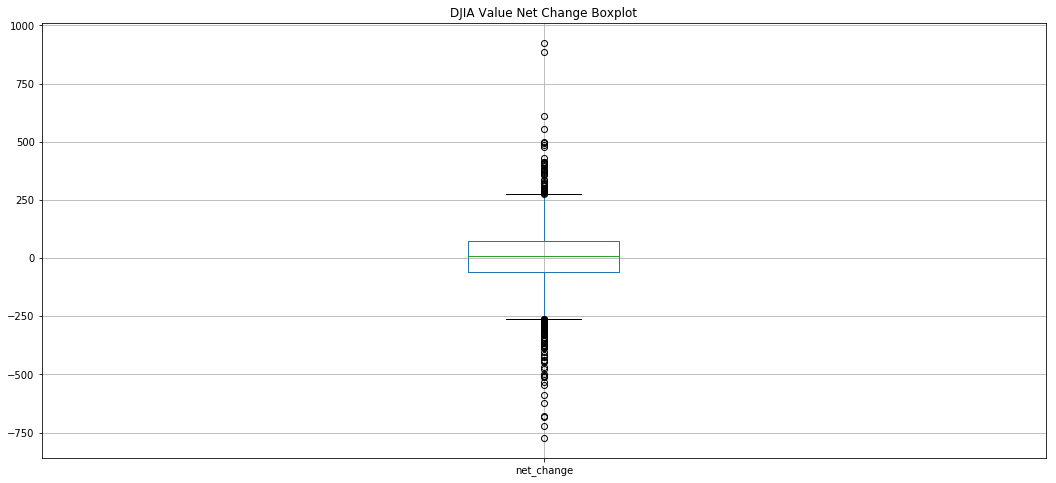

In [16]:
DJIA.boxplot(column='net_change')
plt.title("DJIA Value Net Change Boxplot")
plt.savefig("visualizations/boxplot/DJIA_net_change_boxplot.png")

Very interesting, it actually looks like I was somewhat onto something as the end of the wiskers in the above boxplot are right around the 250 and -250 marks, so while a net change of a couple hundred isn't necessarily an outlier, it is a relatively rare and significant event being near the end of the wiskers, especially when you consider that 50% of net changes are between -60 and 75. Interesting stuff! 

Now I'd like to rerun the correlation matrix and scatter matrix plots to take a look at whether net gain/loss is correlated at all with any of the other columns in the dataset and if so which ones:

In [17]:
DJIA.corr()

,Open,High,Low,Close,Volume,Adj Close,net_change
Open,1.000000,0.999592,0.999436,0.998991,-0.691621,0.998991,-0.017328
High,0.999592,1.000000,0.999373,0.999546,-0.686997,0.999546,0.004102
Low,0.999436,0.999373,1.000000,0.999595,-0.699572,0.999595,0.008678
Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000,0.027595
Volume,-0.691621,-0.686997,-0.699572,-0.694281,1.000000,-0.694281,-0.062772
Adj Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000,0.027595
net_change,-0.017328,0.004102,0.008678,0.027595,-0.062772,0.027595,1.000000


Doesn't look like there's really any correlation between the net change of stocks during the day and any other metrics in this dataset with the strongest correlation here being -0.063, which is essentially nonexistent. I'd still like to checkout the scatter matrix, but I don't anticipate it telling me much:

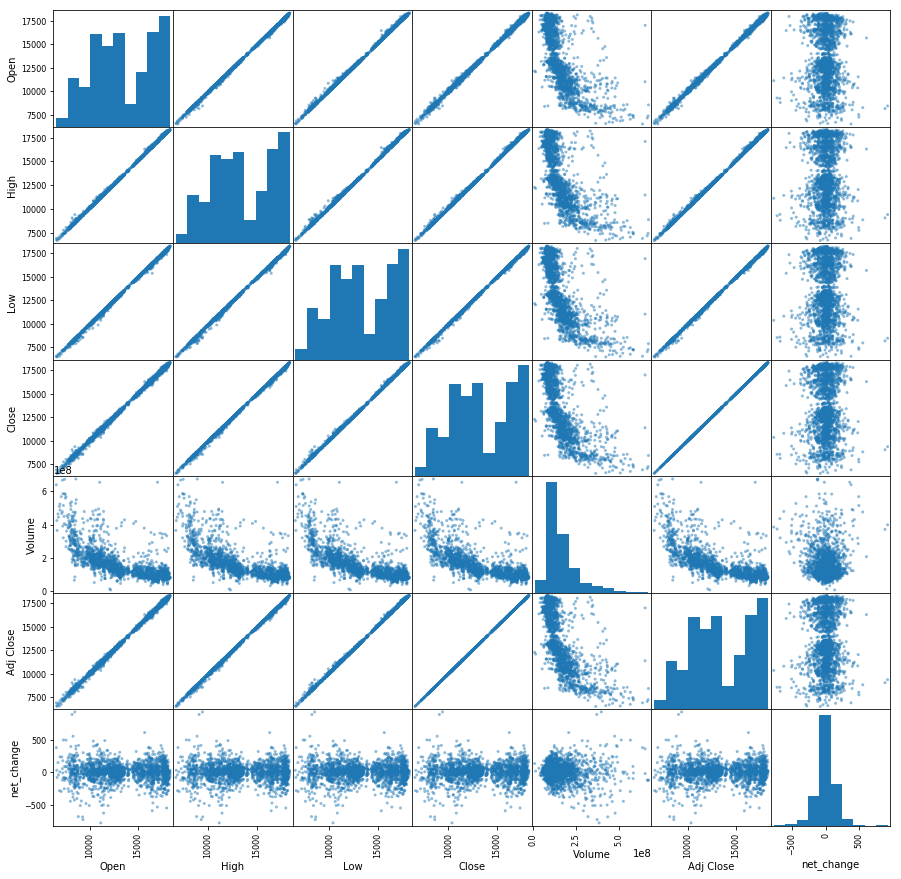

In [18]:
pd.plotting.scatter_matrix(DJIA, figsize = (15, 15))
plt.savefig("visualizations/scatter_matrices/DJIA_scatter_matrix_w_net_change.png")

Just as I suspected, this scatter matrix didn't add any insights. The only thing I'm noticing here is that the variance of the net change widens as the trading volume goes up, which makes sense as trades are really what drive stock price changes, and that the distribution of the net change is actually surprisingly normal to the naked eye. 

That's enough exploration of the stock market data itself, let's pivot to exploring the headlines data a bit more. In my previous notebook I did some preliminary EDA of the headlines just looking at the word frequency distributions of all the headlines overall, but something that I think would be interesting is to isolate the `Top#` columns from the combined dataset and see if there are any noticable differences between the word frequency distributions of these various top headlines. To start, I'll create a `ConditionalFreqDist` where I will set the `Top#` as the condition in order to get frequency distributions by `Top#` headline:

In [19]:
# create empty conditional frequency distribution
cfdist = ConditionalFreqDist()
# loop through columbs of combined dataset
for col in list(combined.columns):
    # only want to work with cleaned columns
    if col.endswith("_cleaned"):
        # set the condition to the Top#
        condition = col.split("_")[0]
        # loop through each entry in the current column
        for item in combined[col]:
            # one item ended up empty after removing all digits and stop words, so skip this
            if str(item) == 'nan':
                continue
            # tokenize words in current item and loop through these
            for word in word_tokenize(item):
                # create word counds by condition in conditional frequency distribution
                cfdist[condition][word] += 1

Now I have my conditional frequency distribution, `cfdist`. Since I'd like to compare the frequency distributions of each `Top#` headlines, but I only really care about the top words in each of these frequency distributions, so now I will isolate the top 10 words from each of the frequency distributions and place them into a set which will contain only the top 10 words from each column:

In [20]:
# initialize set
top_words = set()
# loop through the conditions
for key in list(cfdist.keys()):
    # initialize counter
    count = 0
    # since dictionarys are not sorted, sort them into list of tuples by value descending to ensure getting top counts
    cur_sorted = sorted(cfdist[key].items(), key = operator.itemgetter(1), reverse = True)
    # loop through the sorted list
    for item in cur_sorted:
        # add word to top words
        top_words.add(item[0])
        # increment counter
        count += 1
        # if reached count of 10 for current column break to next column
        if count == 10:
            break
top_words

{'china',
 'government',
 'iran',
 'israel',
 'israeli',
 'killed',
 'new',
 'one',
 'people',
 'police',
 'president',
 'russia',
 'said',
 'says',
 'two',
 'uk',
 'un',
 'us',
 'war',
 'world',
 'year',
 'years'}

Clearly the number of words in the set above are more than just 10, so this tells me that there are some differences between the top words accross differently ranked headlines; however, there aren't so many here that there isn't any overlap between the most frequent words in the variously ranked headlines, so they may not be all that different. Let's plot these frequency distributions to get a better idea of if these differences might be significant. First I want to plot them in a cumulative fashion:

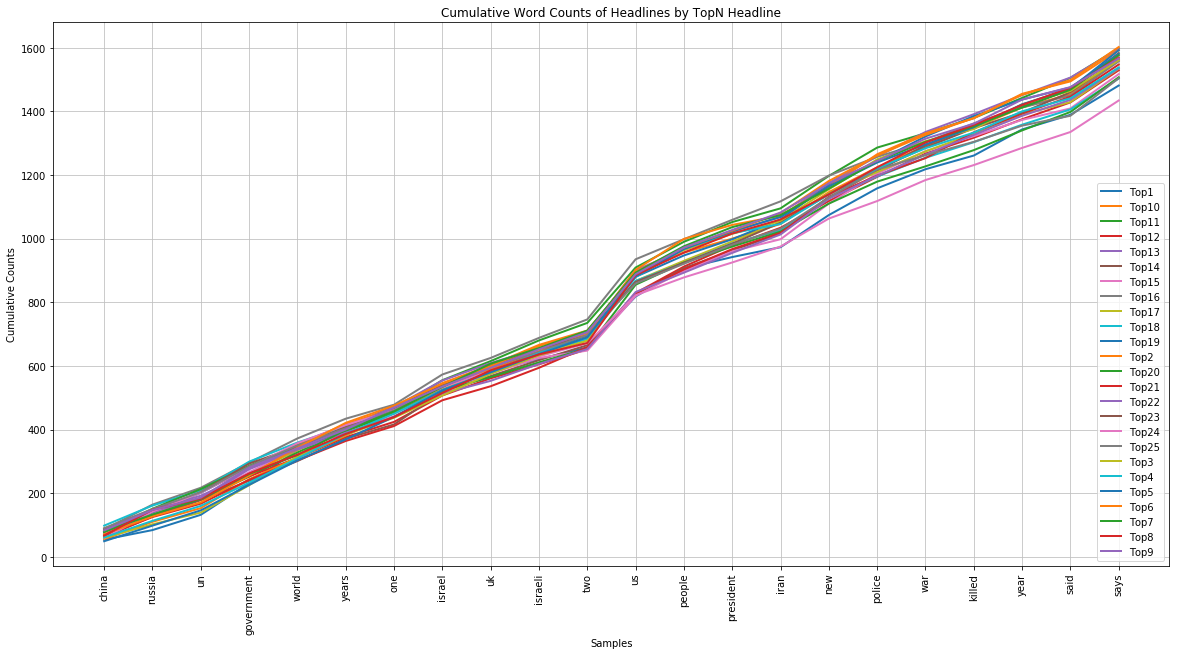

In [21]:
plt.figure(figsize=(20, 10))
plt.title("Cumulative Word Counts of Headlines by TopN Headline")
cfdist.plot(samples = top_words, cumulative = True)

From the output above, there don't appear to be many clear differences between these top word counts and the only real difference between the cumulative counts appears to be between the `Top10` and `Top24` column with the `Top10` column having the highest cumulative word count of these top words and `Top24` has the lowest cumulative word count with this top words, though it is difficult to tell if I have the right columns here since the colors in the legend seem to repeat in the legend. I could plot these with 5 columns at a time but since there aren't many clear differences I'll leave it for now.

In order to get a better idea about the actual differences between these word counts I want to visualize these in a non cumulative fashion, and if I see some clear differences here then perhaps I will plot them 5 columns at a time to get a better idea of which column(s) these counts are truly happening in:

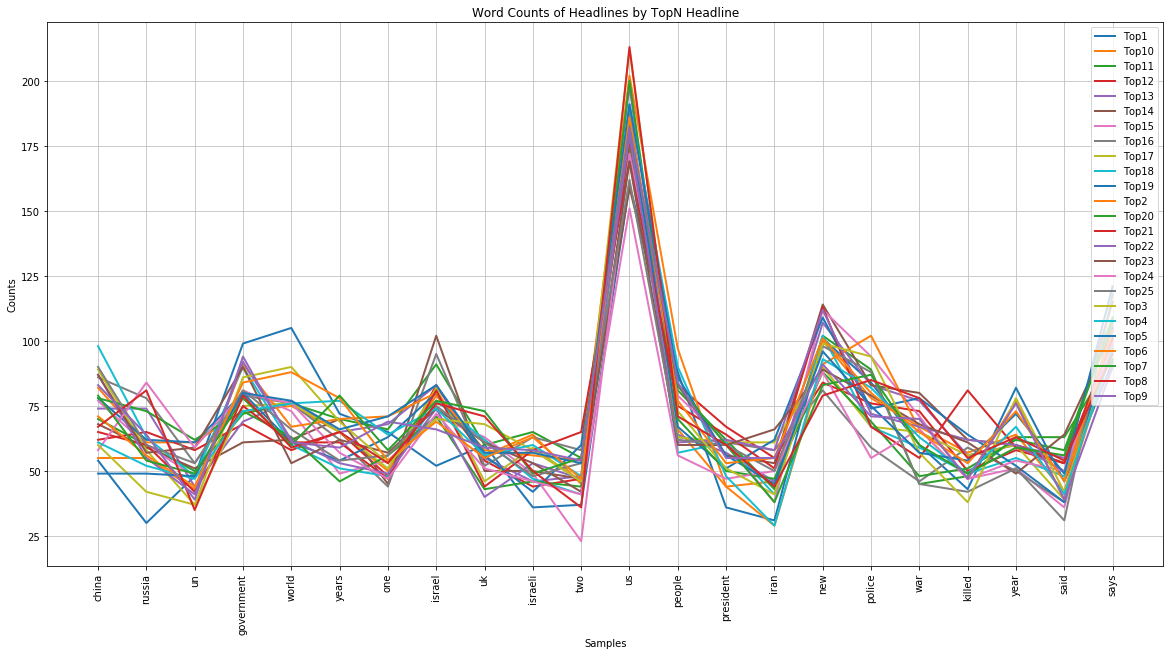

In [22]:
plt.figure(figsize = (20, 10))
plt.title("Word Counts of Headlines by TopN Headline")
cfdist.plot(samples = top_words)

So this actually does show some interesting differences, clearly one of these columns has `world` occur more often than other columns while another column has `two` and still another has `russia` occuring a lot less than the other columns. To get a better idea of which columns these actually are, I'll now plot these 5 columns at a time in 5 different plots:

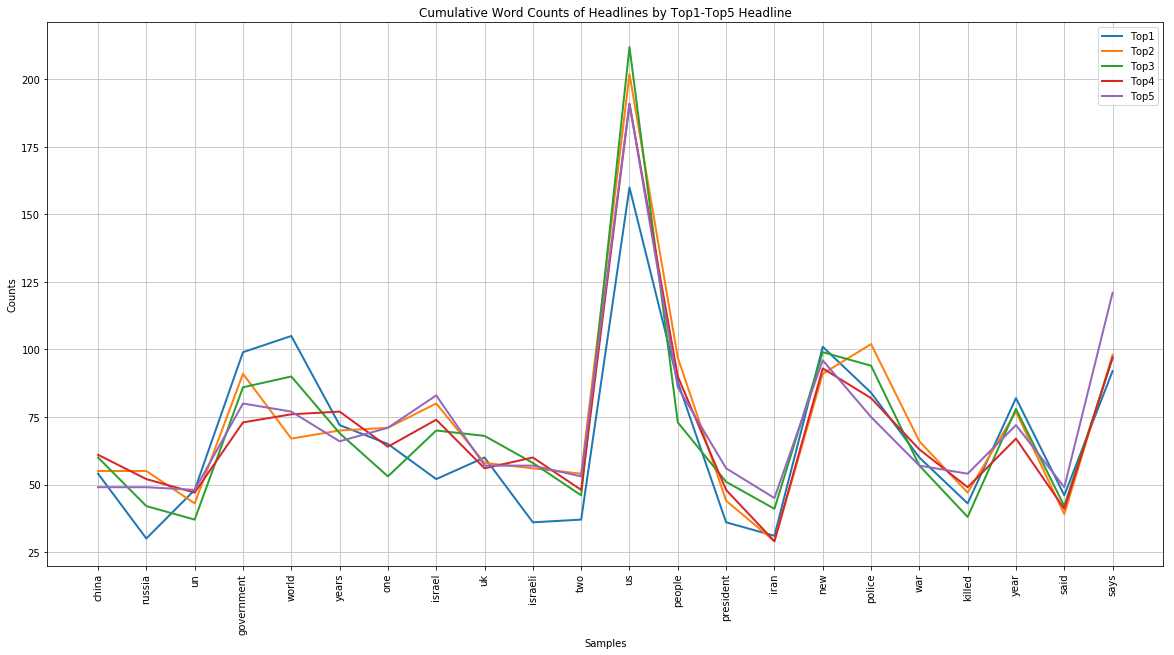

None

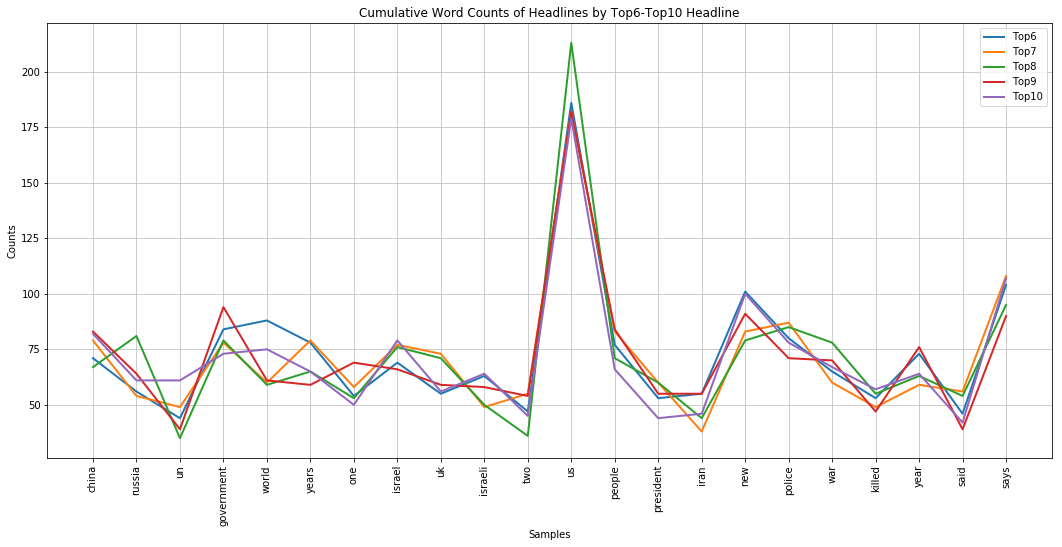

None

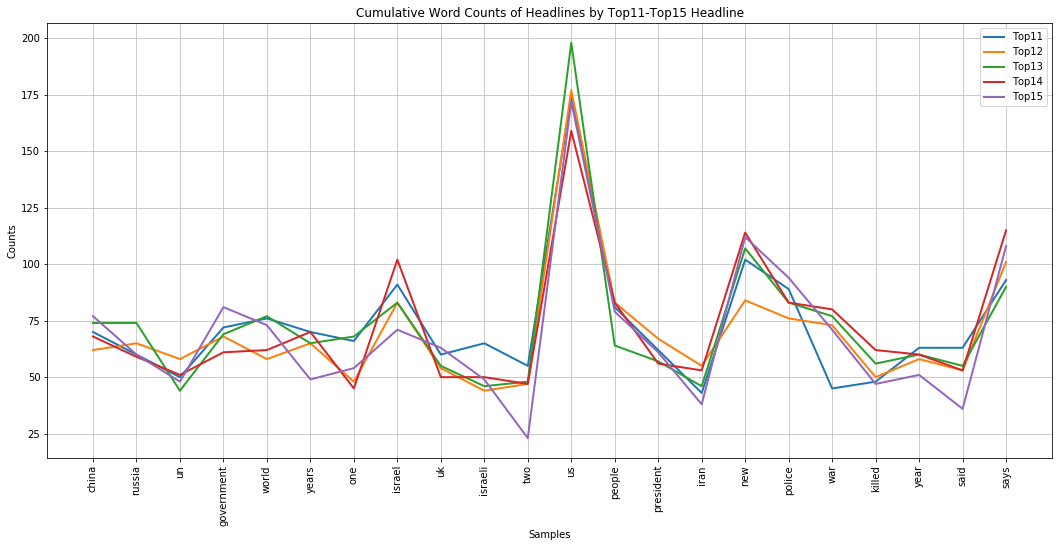

None

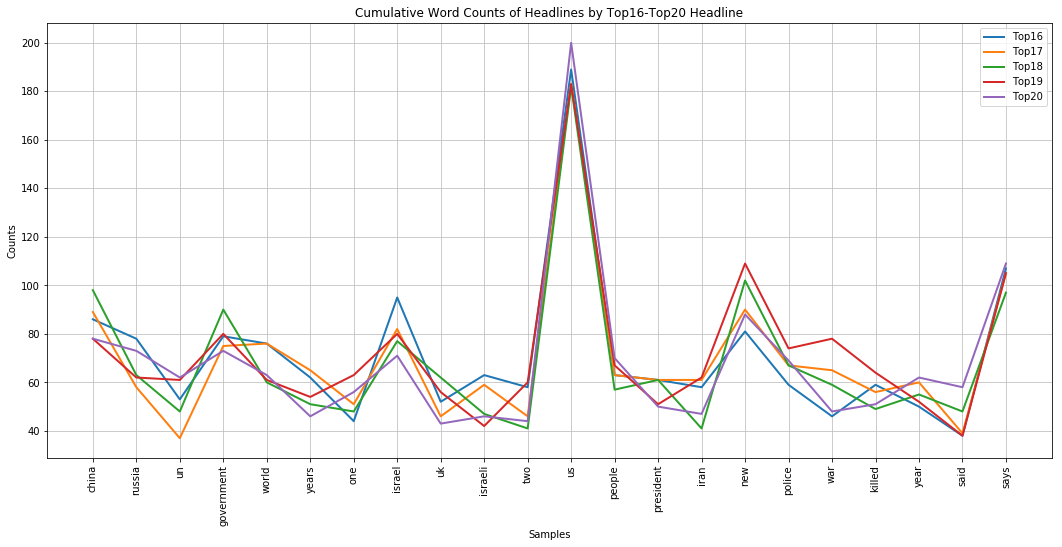

None

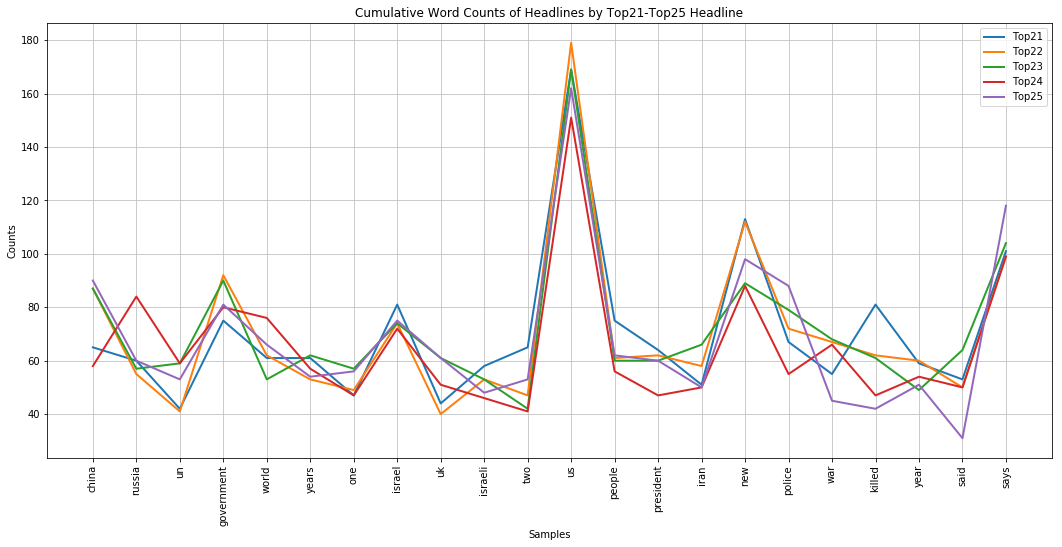

None

In [23]:
plt.figure(figsize = (20, 10))
plt.title("Cumulative Word Counts of Headlines by Top1-Top5 Headline")
display(cfdist.plot(samples = top_words, conditions = ["Top" + str(x) for x in range(1, 6)]))
plt.title("Cumulative Word Counts of Headlines by Top6-Top10 Headline")
display(cfdist.plot(samples = top_words, conditions = ["Top" + str(x) for x in range(6, 11)]))
plt.title("Cumulative Word Counts of Headlines by Top11-Top15 Headline")
display(cfdist.plot(samples = top_words, conditions = ["Top" + str(x) for x in range(11, 16)]))
plt.title("Cumulative Word Counts of Headlines by Top16-Top20 Headline")
display(cfdist.plot(samples = top_words, conditions = ["Top" + str(x) for x in range(16, 21)]))
plt.title("Cumulative Word Counts of Headlines by Top21-Top25 Headline")
display(cfdist.plot(samples = top_words, conditions = ["Top" + str(x) for x in range(21, 26)]))

Now this gives me a better idea of which columns these differences are occuring in. It appears that the `Top1` column is where the increased mention of `world` is coming from while this same column is showing a lower occurance rate of `russia` and `isreali` compared with other columns which, to me, indicates that oftentimes the most popular headlines relate more to global issues rather than individual country issues. Additionally the lower rate of the word `two` seems to come from the `Top15` column, though this really doesn't tell me anything informative. 

Now I'd like to create some more interesting and visually appealing visualizations with this text data, and one way to do this that I haven't had a chance to do in the past is with Word Clouds. To start off, I'd like to create a word cloud using all of the headlines to get a visual representation of what top headlines overall typically talk about. To do this, I'll first need to get all of the headline text into a single string for use with the `WordCloud()` function and then I will be able to create a word cloud on that:

In [24]:
# initialize temporary string
temp = ""
# loop through each headlines in the cleaned headlines
for line in headlines['News_cleaned']:
    # one headline ended up empty after removal of stop words and numbers, so just skip this
    if str(line) == "nan":
        continue
    # append lines to temporary string
    temp += line + " "
# generate word cloud with a max of 100 words using the temporary string
wc = WordCloud(max_words = 100, background_color = 'white').generate(temp)
wc.to_file('visualizations/wordclouds/headlines_corpus_wordcloud.png')

Awesome now that I have my word cloud generated let's display it:

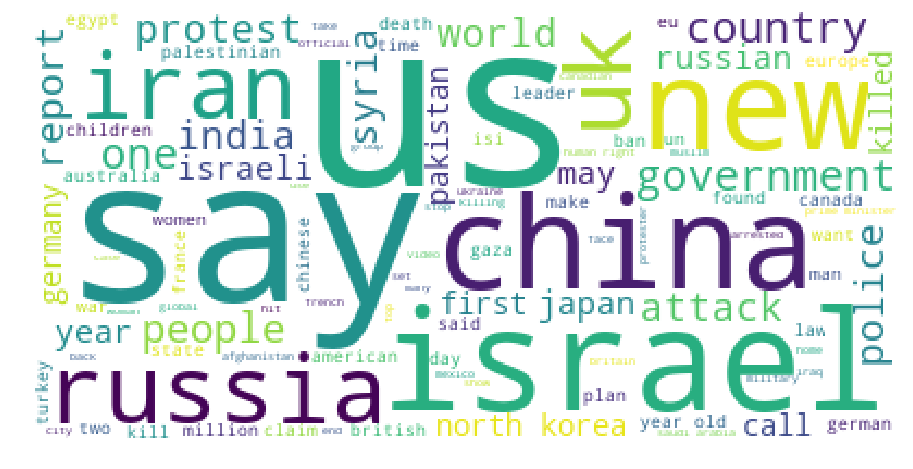

In [25]:
plt.imshow(wc)
plt.axis('off')
plt.show()

Very cool! Clearly many of the top words I mentioned when looking at word frequencies during cleaning are obvious here (US, say, new, police, and government). Something that I found odd, though, is the fact that government and police are actually smaller than other words like China, Israel, Russia, and Iran. I’m not too sure why this is, as I would’ve expected to see the top words from my initial word frequency distributions as the largest words here. Either way this is quite interesting to see visually as it shows us that top news headlines often mention a multitude of countries indicating a general focus global issues/topics.

Next I'd like to create similar word clouds but by isolating individual `Top#` columns to see if there are any obvious differences here. Instead of doing this with all of the 25 `Top#` columns I will just do this with the top 5 following the same process as I did for the above word cloud:

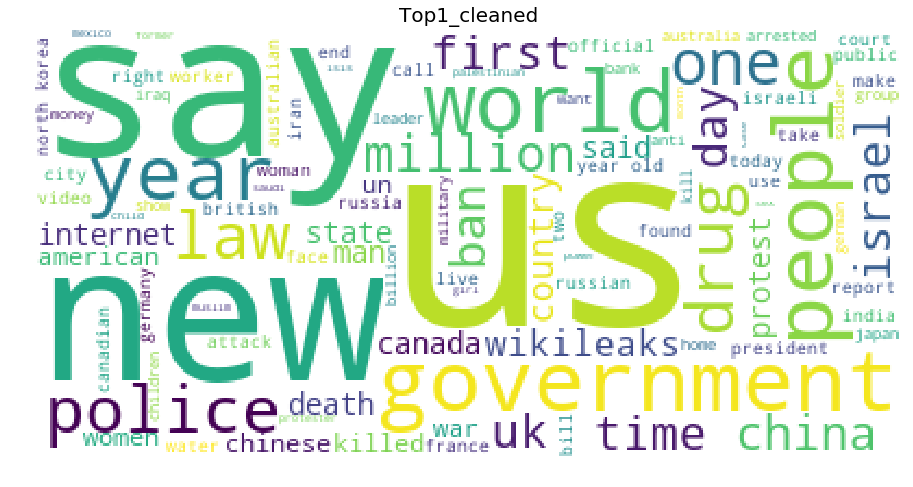

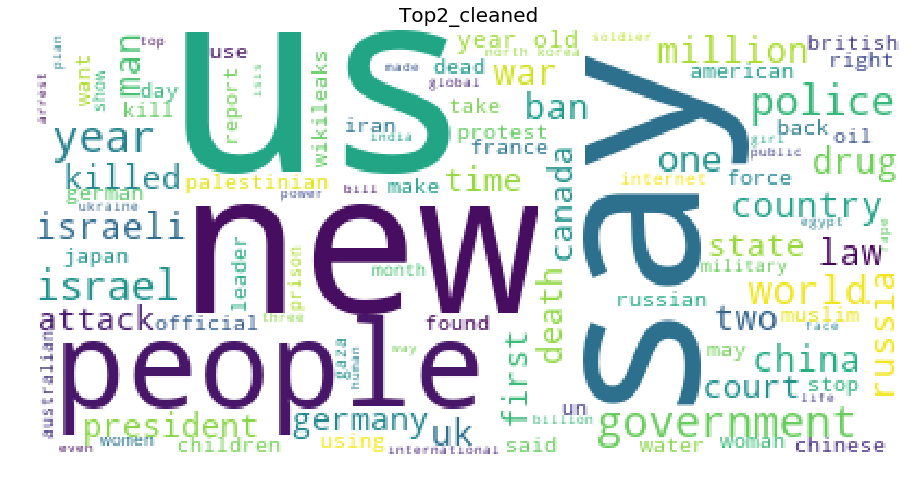

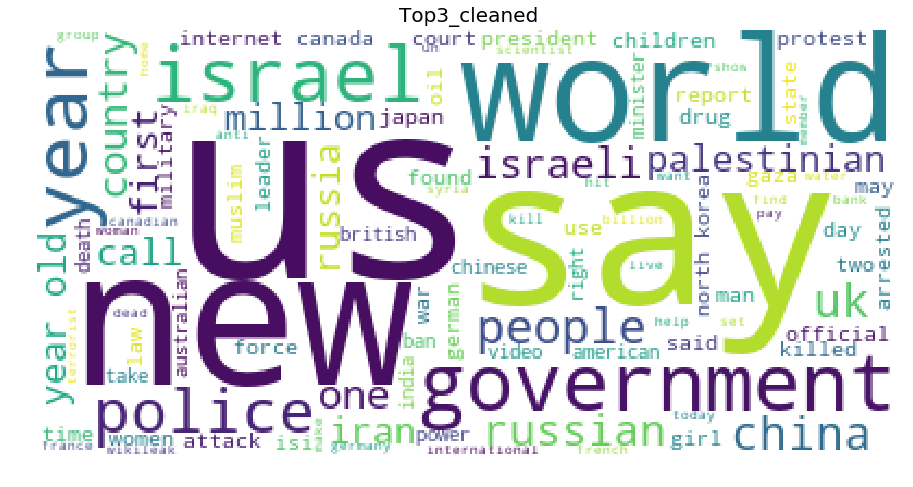

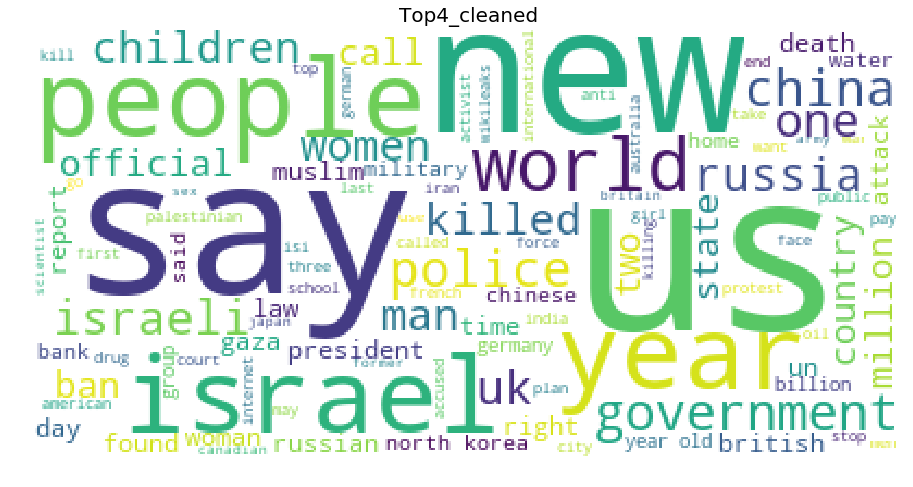

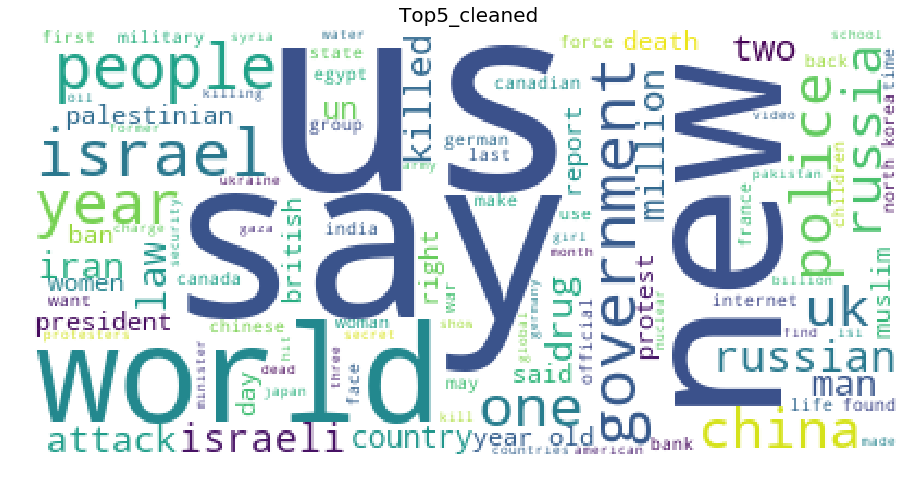

In [26]:
# isolate the top 5 columns
top5 = combined[['Top1_cleaned', 'Top2_cleaned', 'Top3_cleaned', 'Top4_cleaned', 'Top5_cleaned']]
for col in list(top5.columns):
    # initialize temporary string
    temp = ""
    # loop through each headlines in the cleaned headlines
    for line in top5[col]:
        # one headline ended up empty after removal of stop words and numbers, so just skip this
        if str(line) == "nan":
            continue
        # append lines to temporary string
        temp += line + " "
    # generate word cloud with a max of 100 words using the temporary string
    wc = WordCloud(max_words = 100, background_color = 'white').generate(temp)
    wc.to_file('visualizations/wordclouds/{0}_wordcloud.png'.format(str(col)))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(col, fontdict = {
        'fontsize': 20,
        'fontweight' : 5,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'
    })
    plt.show()

Well that didn't tell me as much as I had hoped, really all of the word clouds above appear to be very similar with only the layout and color schemes of the words being noticably different. This tells me that the differences between the top columns are relatively minimal. With that I'm going to call my data adequately explored because I really want to move on to building out my models, which will include sentiment analysis and clustering on the headlines as well as a classification model for determining stock market rise versus fall. In order to keep these notebooks relatively small I will do this step in a separate notebook!